Objective: \
Predict the number of trips between origin and destination for the next week

In [1]:

import datetime
from ipywidgets import *
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import pydeck as pkd
import seaborn as sns
from zipfile import ZipFile


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
zip_path = '/content/drive/My Drive/datasets/BART/bart-ridership.zip'

In [3]:
with ZipFile(zip_path) as zf:
  for n in zf.namelist():
    print(n)

README.txt
ridership/date-hour-soo-dest-2011.csv
ridership/date-hour-soo-dest-2012.csv
ridership/date-hour-soo-dest-2013.csv
ridership/date-hour-soo-dest-2014.csv
ridership/date-hour-soo-dest-2015.csv
ridership/date-hour-soo-dest-2016.csv
ridership/date-hour-soo-dest-2017.csv
ridership/date-hour-soo-dest-2018.csv
ridership/date-hour-soo-dest-2019.csv
ridership/date-hour-soo-dest-2020.csv


In [4]:
with ZipFile(zip_path) as zf:
  with zf.open('ridership/date-hour-soo-dest-2015.csv') as rf:
    df = pd.read_csv(rf, nrows=1500000)

In [5]:
df.head()

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2015-01-01,0,12TH,12TH,1
1,2015-01-01,0,12TH,16TH,1
2,2015-01-01,0,12TH,24TH,3
3,2015-01-01,0,12TH,ASHB,6
4,2015-01-01,0,12TH,BALB,3


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 5 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Date                 1500000 non-null  datetime64[ns]
 1   Hour                 1500000 non-null  int64         
 2   Origin Station       1500000 non-null  object        
 3   Destination Station  1500000 non-null  object        
 4   Trip Count           1500000 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 57.2+ MB


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hour,1500000.0,13.633393,5.705375,0.0,9.0,14.0,18.0,23.0
Trip Count,1500000.0,12.036259,30.937285,1.0,2.0,4.0,10.0,931.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 5 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Date                 1500000 non-null  datetime64[ns]
 1   Hour                 1500000 non-null  int64         
 2   Origin Station       1500000 non-null  object        
 3   Destination Station  1500000 non-null  object        
 4   Trip Count           1500000 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 57.2+ MB


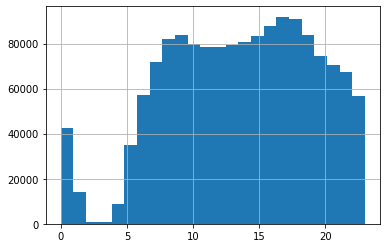

In [10]:
df['Hour'].hist(bins = 24)

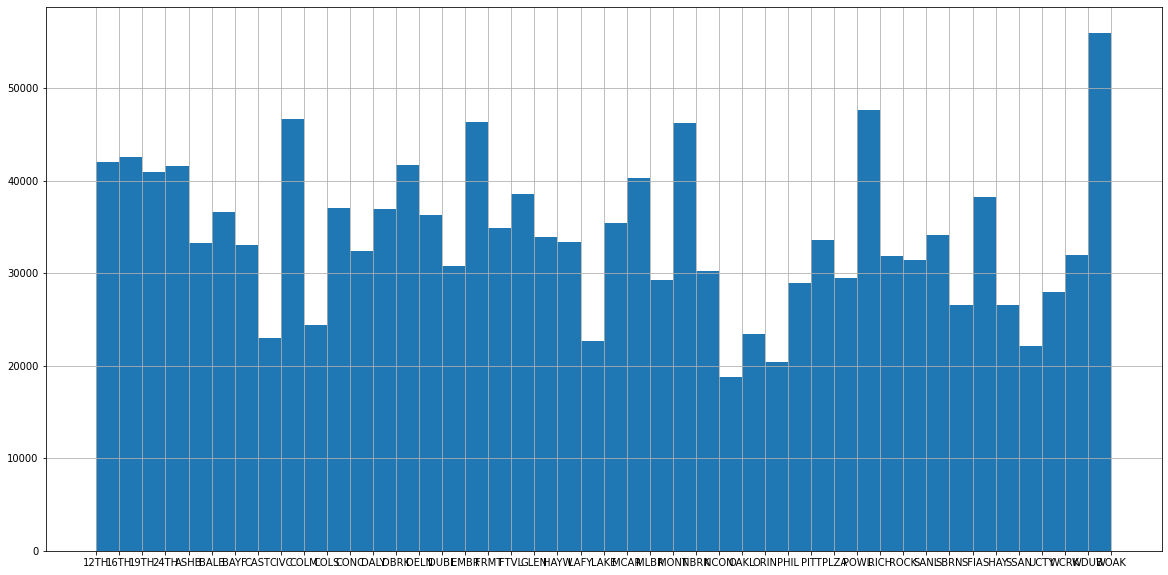

In [11]:
df['Origin Station'].hist(figsize=(20,10), bins=44)

In [12]:
df['Origin Station'].unique()

array(['12TH', '16TH', '19TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CAST',
       'CIVC', 'COLM', 'COLS', 'CONC', 'DALY', 'DBRK', 'DELN', 'DUBL',
       'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE', 'MCAR',
       'MLBR', 'MONT', 'NBRK', 'NCON', 'OAKL', 'ORIN', 'PHIL', 'PITT',
       'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN', 'SFIA', 'SHAY',
       'SSAN', 'UCTY', 'WCRK', 'WDUB', 'WOAK'], dtype=object)

In [13]:
df.columns = [n.lower() for n in df.columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 5 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   date                 1500000 non-null  datetime64[ns]
 1   hour                 1500000 non-null  int64         
 2   origin station       1500000 non-null  object        
 3   destination station  1500000 non-null  object        
 4   trip count           1500000 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 57.2+ MB


In [15]:
week_lis = list(map(lambda x: x.isocalendar()[1], df['date']))
df['year'] = df['date'].apply(lambda x: x.year).astype('int32') - 2000
df['num_month'] = (df['year']*100) + list(df.date.apply(lambda x: x.month))
df['num_week'] = (df['num_month']*100) + week_lis
df['num_day'] = (df['num_week']*100) + list(df.date.apply(lambda x: x.day))
df['num_hour'] = (df['num_day']*100) + df['hour']

In [16]:
df.tail()

,date,hour,origin station,destination station,trip count,year,num_month,num_week,num_day,num_hour
1499995,2015-02-24,22,SBRN,UCTY,1,15,1502,150209,15020924,1502092422
1499996,2015-02-24,22,SFIA,12TH,8,15,1502,150209,15020924,1502092422
1499997,2015-02-24,22,SFIA,16TH,9,15,1502,150209,15020924,1502092422
1499998,2015-02-24,22,SFIA,19TH,1,15,1502,150209,15020924,1502092422
1499999,2015-02-24,22,SFIA,24TH,11,15,1502,150209,15020924,1502092422


Plots

In [17]:
q = df.groupby(['hour','origin station', 'destination station']).agg({'trip count':'sum'}).reset_index()

In [18]:
q1 = pd.pivot_table(q[q.hour == 1], values='trip count', index=['origin station'],
                    columns=['destination station'], fill_value = 0, aggfunc= np.sum)

In [19]:
q2 = df.groupby(['origin station', 'destination station']).agg({'trip count':'sum'}).reset_index()

In [20]:
q21 = pd.pivot_table(q2, index=['origin station'], columns=['destination station'], values='trip count', fill_value=0, aggfunc=np.sum)

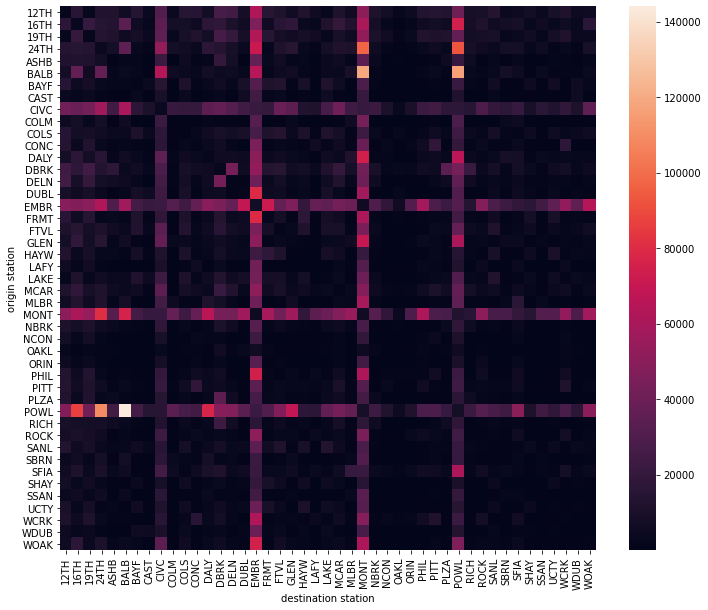

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(q21)

In [22]:
s_origin = df.groupby(['hour', 'origin station']).agg({'trip count': ['sum']}).reset_index()
s_origin.columns = ['hour', 'origin station', 'trip origin']

s_dest = df.groupby(['hour', 'destination station']).agg({'trip count': ['sum']}).reset_index()
s_dest.columns = ['hour', 'destination station', 'trip dest']

In [23]:
df_s = s_origin.merge(s_dest, how='left', left_on='origin station', right_on='destination station')
df_s.drop('hour_y', axis=1, inplace=True)

In [24]:

@interact(hours=(0,23,1))
def s_plot(hours=23):
  df_o = s_origin[s_origin.hour == hours]
  df_d = s_dest[s_dest.hour == hours]

  fig, ax = plt.subplots(figsize=(10,7))
  df_o.plot.bar(x='origin station', y='trip origin',  ax=ax, alpha=0.6, color='g')
  df_d.plot.bar(x='destination station', y='trip dest',  ax=ax, alpha=0.6)
  plt.tight_layout()
  

interactive(children=(IntSlider(value=23, description='hours', max=23), Output()), _dom_classes=('widget-inter…

Lets look at the top 4 stations \
CIVC, EMBR, MONT, POWL

In [25]:
 lis = list(df_s[(df_s.hour_x == 18) & (df_s['trip dest'] > 100000)]['origin station'].unique())

In [26]:
p = df[df['origin station'].isin(lis)]
p = p[p['destination station'].isin(lis)]

In [27]:
p = p.groupby(['hour', 'origin station', 'destination station']).agg({'trip count':'sum'}).reset_index()

In [28]:

@interact(hours=(0,23))
def heat(hours=23):
  p1 = p[p.hour==hours].copy()
  p1 = pd.pivot_table(p1, index=['origin station'], columns =['destination station'], values='trip count', fill_value=0, aggfunc=np.sum)
  plt.figure(figsize=(12,10))
  sns.heatmap(p1)

interactive(children=(IntSlider(value=23, description='hours', max=23), Output()), _dom_classes=('widget-inter…

In [29]:
df_b = pd.read_csv('/content/drive/My Drive/bart_ridership/datasets_12522_17125_station_info.csv')

In [30]:
df_b.columns = list(map(lambda x: x.lower(), df_b.columns))

In [31]:
df_b.description.iloc[2]

'1900 Broadway, Oakland CA 94612<br />19th Street Station is in the heart of Uptown Oakland near the historic Paramount Theater on Broadway.'

In [32]:
df_b['address'] = df_b['description'].apply(lambda x: x.split('<br />')[0])
df_b['city'] = df_b['address'].apply(lambda x: x.split(',')[1].split('CA')[0].strip())

In [33]:
df_b['city'].mask(df_b['city'] == 'Level 3', 'SFO', inplace=True)

In [34]:
df_b.head()

,abbreviation,description,location,name,address,city
0,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH),"1245 Broadway, Oakland CA 94612",Oakland
1,16TH,"2000 Mission Street, San Francisco CA 94110<br...","-122.419694,37.765062,0",16th St. Mission (16TH),"2000 Mission Street, San Francisco CA 94110",San Francisco
2,19TH,"1900 Broadway, Oakland CA 94612<br />19th Stre...","-122.268602,37.808350,0",19th St. Oakland (19TH),"1900 Broadway, Oakland CA 94612",Oakland
3,24TH,"2800 Mission Street, San Francisco CA 94110<br...","-122.418143,37.752470,0",24th St. Mission (24TH),"2800 Mission Street, San Francisco CA 94110",San Francisco
4,ASHB,"3100 Adeline Street, Berkeley CA 94703<br />As...","-122.270062,37.852803,0",Ashby (ASHB),"3100 Adeline Street, Berkeley CA 94703",Berkeley


In [35]:
df_b['x'] = df_b.location.apply(lambda x: x.split(',')[0])
df_b['y'] = df_b.location.apply(lambda x: x.split(',')[1])

df_loc = df_b[['abbreviation', 'x', 'y']]

In [36]:
df_bcity = df_b[['city', 'abbreviation']].set_index('abbreviation')


In [37]:
df['origin city'] = df['origin station'].map(df_bcity['city'])
df['dest city'] = df['destination station'].map(df_bcity['city'])

In [38]:
df_b.head()

,abbreviation,description,location,name,address,city,x,y
0,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH),"1245 Broadway, Oakland CA 94612",Oakland,-122.271450,37.803768
1,16TH,"2000 Mission Street, San Francisco CA 94110<br...","-122.419694,37.765062,0",16th St. Mission (16TH),"2000 Mission Street, San Francisco CA 94110",San Francisco,-122.419694,37.765062
2,19TH,"1900 Broadway, Oakland CA 94612<br />19th Stre...","-122.268602,37.808350,0",19th St. Oakland (19TH),"1900 Broadway, Oakland CA 94612",Oakland,-122.268602,37.808350
3,24TH,"2800 Mission Street, San Francisco CA 94110<br...","-122.418143,37.752470,0",24th St. Mission (24TH),"2800 Mission Street, San Francisco CA 94110",San Francisco,-122.418143,37.752470
4,ASHB,"3100 Adeline Street, Berkeley CA 94703<br />As...","-122.270062,37.852803,0",Ashby (ASHB),"3100 Adeline Street, Berkeley CA 94703",Berkeley,-122.270062,37.852803


In [39]:
dfs = pd.DataFrame(list(itertools.combinations(df_b.abbreviation,2)), columns=['origin station', 'dest station'] )

In [40]:
def xy_map(df):
  dfs = df.copy()
  for n in ['origin station', 'destination station']:
    for z in ['x', 'y']:
      dfs[n+' ' +z] = dfs[n].map(df_b.set_index('abbreviation')[z]).astype('float64')
  return dfs

In [41]:
df = xy_map(df)

In [42]:
df.head()

,date,hour,origin station,destination station,trip count,year,num_month,num_week,num_day,num_hour,origin city,dest city,origin station x,origin station y,destination station x,destination station y
0,2015-01-01,0,12TH,12TH,1,15,1501,150101,15010101,1501010100,Oakland,Oakland,-122.27145,37.803768,-122.271450,37.803768
1,2015-01-01,0,12TH,16TH,1,15,1501,150101,15010101,1501010100,Oakland,San Francisco,-122.27145,37.803768,-122.419694,37.765062
2,2015-01-01,0,12TH,24TH,3,15,1501,150101,15010101,1501010100,Oakland,San Francisco,-122.27145,37.803768,-122.418143,37.752470
3,2015-01-01,0,12TH,ASHB,6,15,1501,150101,15010101,1501010100,Oakland,Berkeley,-122.27145,37.803768,-122.270062,37.852803
4,2015-01-01,0,12TH,BALB,3,15,1501,150101,15010101,1501010100,Oakland,San Francisco,-122.27145,37.803768,-122.447506,37.721585


In [43]:
df['distance']= np.linalg.norm(df[["origin station y", "origin station x"]].values - df[["destination station y", "destination station x"]].values, axis=1)

In [44]:
df.drop(df.columns[-5:-1],axis=1, inplace=True)

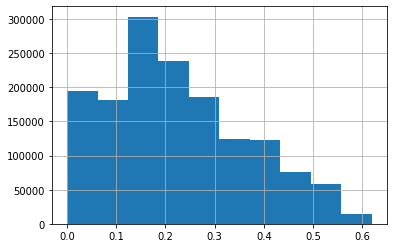

In [45]:
df.distance.hist(bins=10)

In [46]:
df['distance'] = pd.cut(df.distance, 10)

In [47]:
df.head()

,date,hour,origin station,destination station,trip count,year,num_month,num_week,num_day,num_hour,origin city,dest city,distance
0,2015-01-01,0,12TH,12TH,1,15,1501,150101,15010101,1501010100,Oakland,Oakland,"(-0.000619, 0.0619]"
1,2015-01-01,0,12TH,16TH,1,15,1501,150101,15010101,1501010100,Oakland,San Francisco,"(0.124, 0.186]"
2,2015-01-01,0,12TH,24TH,3,15,1501,150101,15010101,1501010100,Oakland,San Francisco,"(0.124, 0.186]"
3,2015-01-01,0,12TH,ASHB,6,15,1501,150101,15010101,1501010100,Oakland,Berkeley,"(-0.000619, 0.0619]"
4,2015-01-01,0,12TH,BALB,3,15,1501,150101,15010101,1501010100,Oakland,San Francisco,"(0.186, 0.248]"


In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le = LabelEncoder()
n = df.columns[-3:]
df1 = df.copy()
for name in n:
  df1[name] = le.fit_transform(df1[name])

In [50]:
del df

In [51]:
def align(df):
  for n in ['num_month', 'num_week', 'num_hour', 'num_day']:
    ls = list(df1[n].unique())
    ls.sort()
    ls1 = {ls[i]: i for i in range(len(ls))}
    df[n] = df[n].map(ls1)
  return df

In [52]:
df1 = align(df1)

In [53]:
df1.tail()

,date,hour,origin station,destination station,trip count,year,num_month,num_week,num_day,num_hour,origin city,dest city,distance
1499995,2015-02-24,22,SBRN,UCTY,1,15,1,9,54,1227,17,21,6
1499996,2015-02-24,22,SFIA,12TH,8,15,1,9,54,1227,16,11,3
1499997,2015-02-24,22,SFIA,16TH,9,15,1,9,54,1227,16,18,2
1499998,2015-02-24,22,SFIA,19TH,1,15,1,9,54,1227,16,11,3
1499999,2015-02-24,22,SFIA,24TH,11,15,1,9,54,1227,16,18,2


In [54]:
def labe(df):
  for n in ['origin station', 'destination station']:
    df[n] = le.fit_transform(df[n])
  return df

In [55]:
df1 = labe(df1)

In [56]:
df1.drop(['date', 'year'],axis=1, inplace=True)

Creating lag features \
again we are predicting next hour trip counts\
the matching IDs are origin, destination, and num_day \
prediction trip count for 2100 combinations

In [57]:
df1.head()

,hour,origin station,destination station,trip count,num_month,num_week,num_day,num_hour,origin city,dest city,distance
0,0,0,0,1,0,0,0,0,11,11,0
1,0,0,1,1,0,0,0,0,11,18,2
2,0,0,3,3,0,0,0,0,11,18,2
3,0,0,4,6,0,0,0,0,11,0,0
4,0,0,5,3,0,0,0,0,11,18,3


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype
---  ------               --------------    -----
 0   hour                 1500000 non-null  int64
 1   origin station       1500000 non-null  int64
 2   destination station  1500000 non-null  int64
 3   trip count           1500000 non-null  int64
 4   num_month            1500000 non-null  int64
 5   num_week             1500000 non-null  int64
 6   num_day              1500000 non-null  int64
 7   num_hour             1500000 non-null  int64
 8   origin city          1500000 non-null  int64
 9   dest city            1500000 non-null  int64
 10  distance             1500000 non-null  int64
dtypes: int64(11)
memory usage: 125.9 MB


In [59]:
df_test = df1[df1.num_hour == 1224]

In [60]:
df1 = df1.loc[df1.num_hour <1224]

In [61]:
def lag_feature(df, lags, col):
  temp = df[['origin station', 'destination station', 'num_hour', col]]
  for i in range(lags):
    shift = temp.copy()
    shift.columns = ['origin station', 'destination station', 'num_hour', col+' '+'lagged_' + str(i)]
    shift['num_hour'] += i
    df = pd.merge(df, shift, how='left', on= ['origin station', 'destination station', 'num_hour'])
  return df

In [ ]:
def ctype(df, cols, type):
  for n in df.columns[cols:]:
    df[n] = df[n].astype(type)
  return df

In [62]:
df1 = ctype(df1, 0, 'int32')

In [63]:
df1 = lag_feature(df1, 5, 'trip count')

In [64]:
df1 = ctype(df1, -4, 'float32')

num_day/ avg trip count

In [66]:
ls = df1.groupby(['num_day', 'origin station', 'destination station']).agg({'trip count':'mean'}).reset_index()
ls.columns = ['num_day', 'origin station', 'destination station','avg trip count']

In [68]:
df1 = pd.merge(df1, ls, on=['num_day', 'origin station', 'destination station'], how='left')
df1 = lag_feature(df1, 5, 'avg trip count')
df1.drop('avg trip count', axis=1 ,inplace=True)

In [76]:
df1 = ctype(df1, -9, 'float32')

num_month/ avg trip count

In [79]:
ls = df1.groupby(['num_month', 'origin station', 'destination station']).agg({'trip count':'mean'}).reset_index()
ls.columns = ['num_month', 'origin station', 'destination station','avg trip count']

df1 = pd.merge(df1, ls, on=['num_month', 'origin station', 'destination station'], how='left')
df1 = lag_feature(df1, 2, 'avg trip count')
df1.drop('avg trip count', axis=1 ,inplace=True)

In [82]:
df1 = ctype(df1, -2, 'float32')

num_hour/ avg trip count

In [83]:
ls = df1.groupby(['num_hour', 'origin station', 'destination station']).agg({'trip count':'mean'}).reset_index()
ls.columns = ['num_hour', 'origin station', 'destination station','avg trip count']

df1 = pd.merge(df1, ls, on=['num_hour', 'origin station', 'destination station'], how='left')
df1 = lag_feature(df1, 5, 'avg trip count')
df1.drop('avg trip count', axis=1 ,inplace=True)

In [85]:
df1 = ctype(df1, -4, 'float32')

In [93]:
le = round(len(df1)/2)
df1.iloc[:le].isnull().sum()

hour                              0
origin station                    0
destination station               0
trip count                        0
num_month                         0
num_week                          0
num_day                           0
num_hour                          0
origin city                       0
dest city                         0
distance                          0
trip count lagged_0               0
trip count lagged_1          151394
trip count lagged_2          182366
trip count lagged_3          212004
trip count lagged_4          233919
avg trip count lagged_0_x         0
avg trip count lagged_1_x    151394
avg trip count lagged_2_x    182366
avg trip count lagged_3_x    212004
avg trip count lagged_4_x    233919
avg trip count lagged_0_y         0
avg trip count lagged_1_y    151394
avg trip count lagged_0           0
avg trip count lagged_1      151394
avg trip count lagged_2_y    182366
avg trip count lagged_3_y    212004
avg trip count lagged_4_y   

In [94]:
dfs = df1.iloc[:le].dropna(axis=0)

In [98]:
dfs = dfs.append(df1.iloc[le:])

In [103]:
dfs.fillna(0, inplace=True)

In [104]:
del df1

In [105]:
dfs.tail()


,hour,origin station,destination station,trip count,num_month,num_week,num_day,num_hour,origin city,dest city,distance,trip count lagged_0,trip count lagged_1,trip count lagged_2,trip count lagged_3,trip count lagged_4,avg trip count lagged_0_x,avg trip count lagged_1_x,avg trip count lagged_2_x,avg trip count lagged_3_x,avg trip count lagged_4_x,avg trip count lagged_0_y,avg trip count lagged_1_y,avg trip count lagged_0,avg trip count lagged_1,avg trip count lagged_2_y,avg trip count lagged_3_y,avg trip count lagged_4_y
1494562,18,44,39,1,1,9,54,1223,11,8,4,1,1.0,3.0,1.0,1.0,1.454545,1.454545,1.454545,1.454545,1.454545,1.514151,1.514151,1,1.0,3.0,1.0,1.0
1494563,18,44,40,1,1,9,54,1223,11,20,3,1,2.0,0.0,1.0,0.0,1.666667,1.666667,0.000000,1.666667,0.000000,1.552941,1.552941,1,2.0,0.0,1.0,0.0
1494564,18,44,41,1,1,9,54,1223,11,21,5,1,3.0,0.0,2.0,0.0,1.833333,1.833333,0.000000,1.833333,0.000000,1.466292,1.466292,1,3.0,0.0,2.0,0.0
1494565,18,44,42,2,1,9,54,1223,11,22,4,2,3.0,0.0,2.0,0.0,2.500000,2.500000,0.000000,2.500000,0.000000,1.813008,1.813008,2,3.0,0.0,2.0,0.0
1494566,18,44,43,1,1,9,54,1223,11,5,6,1,1.0,0.0,0.0,0.0,1.500000,1.500000,0.000000,0.000000,0.000000,1.455056,1.455056,1,1.0,0.0,0.0,0.0


In [108]:
dfs1 = dfs.drop(['hour', 'num_month', 'num_week', 'num_day'], axis=1)

In [112]:
dfs_test = dfs1[dfs1.num_hour==1223]
dfs1 = dfs1[dfs1.num_hour<1223]

In [114]:
y_train = dfs1.pop('trip count')
X_train = dfs1

In [115]:
y_test = dfs_test.pop('trip count')
X_test = dfs_test

Plug it in XGB

In [127]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [124]:
model = XGBRegressor()
model.fit(X_train, y_train)

[23:06:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [125]:
result = model.predict(X_test)

In [128]:
for n in [r2_score, mean_absolute_error, mean_squared_error]:
  print(n(y_test, result))

0.9999439716611941
0.1542849733005186
0.18684455172324665


In [136]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

result = lr.predict(X_test)

In [ ]:
for n in [r2_score, mean_absolute_error, mean_squared_error]:
  print(n(y_test, result))

In [ ]:
plt.scatter(y_test, result)